In [5]:
import matplotlib.pyplot as plt

from lightning_bg.utils import load_data, dataset_setter, load_model_kwargs
from lightning_bg.models import get_network_by_name
import torch
import numpy as np

from lightning_bg.evaluate import ShowTraj

def load_from_checkpoint(checkpoint_path, data_path, model_class):
    coordinates, system = load_data(data_path)
    train_split = .7
    train_data, val_data, test_data = dataset_setter(coordinates, system, val_split=(.8 - train_split),
                                                     test_split=.2, seed=42)
    ModelClass = get_network_by_name(model_class)
    ParamClass = ModelClass.hparams_type
    hparams = torch.load(checkpoint_path.rstrip("/") + "/checkpoints/last.ckpt")['hyper_parameters']
    model_kwargs = load_model_kwargs(ModelClass, train_data, val_data, system)
    model = ModelClass.load_from_checkpoint(checkpoint_path.rstrip("/") + "/checkpoints/last.ckpt",
                                            hparams=hparams,
                                            **model_kwargs
                                            )
    return model, test_data, system

In [6]:
model_1b4z_RNVPICfwkl, test_1b4z, system_1b4z = load_from_checkpoint("../data/lightning_logs/OppA/Peptides/1b4z/RNVPICfwkl/version_8", "../data/Molecules/OppA/Peptides/1b4z", "RNVPICfwkl")
# model_1b4z_RNVPICfwkl2, _, _ = load_from_checkpoint("../data/lightning_logs/OppA/Peptides/1b4z/RNVPICfwkl/version_1", "../data/Molecules/OppA/Peptides/1b4z", "RNVPICfwkl")
model_1b4z_RNVPfwkl, _, _ = load_from_checkpoint("../data/lightning_logs/OppA/Peptides/1b4z/RNVPfwkl/version_8", "../data/Molecules/OppA/Peptides/1b4z", "RNVPfwkl")

/home/kortkamp/BG/modules/bgmol/bgmol/zmatrix.py:317: UserWarning: Z-matrix torsions are not fully independent because of a constraint on HA.
  warnings.warn("Z-matrix torsions are not fully independent because of a constraint on HA.")


In [12]:
x = model_1b4z_RNVPfwkl.sample((10,))

In [7]:
energyIC = system_1b4z.energy_model.energy(model_1b4z_RNVPICfwkl.sample((10_000,))).cpu().detach().numpy()
# energyIC2 = system_1b4z.energy_model.energy(model_1b4z_RNVPICfwkl2.sample((10_000,))).cpu().detach().numpy()
energyCC = system_1b4z.energy_model.energy(model_1b4z_RNVPfwkl.sample((10_000,))).cpu().detach().numpy()
energy_target = system_1b4z.energy_model.energy(test_1b4z[:10_000]).cpu().detach().numpy()

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 3 but got size 10000 for tensor number 1 in the list.

In [ ]:
plt.hist(energy_target, bins=100, histtype="step", label=r"$p^*$")
plt.hist(energyIC, bins=100, histtype="step", label=r"$\hat p_{IC}$", range=(-500, 2000))
# plt.hist(energyIC2, bins=100, histtype="step", label=r"$\hat p_{IC2}$", range=(-500, 2000))
plt.hist(energyCC, bins=100, histtype="step", label=r"$\hat p_{CC}$", range=(-500, 2000))
plt.legend()
plt.xlabel("Energy [kT]")
plt.ylabel("Counts")
plt.yscale("log")
plt.title("1B4Z")
plt.savefig("1b4z_large2.svg", bbox_inches="tight")

In [3]:
model_alanine_RNVPICfwkl, test_alanine, system_alanine = load_from_checkpoint("../data/lightning_logs/alanine_dipeptide/RNVPICfwkl/version_4", "../data/Molecules/alanine_dipeptide", "RNVPICfwkl")
model_alanine_RNVPfwkl, _, _ = load_from_checkpoint("../data/lightning_logs/alanine_dipeptide/RNVPfwkl/version_16", "../data/Molecules/alanine_dipeptide", "RNVPfwkl")
model_alanine_RQSfwkl, _, _ = load_from_checkpoint("../data/lightning_logs/alanine_dipeptide/RQSfwkl/version_2", "../data/Molecules/alanine_dipeptide", "RQSfwkl")
model_alanine_RNVPfwkl2, _, _ = load_from_checkpoint("../data/lightning_logs/alanine_dipeptide/RNVPfwkl/version_10", "../data/Molecules/alanine_dipeptide", "RNVPfwkl")

Using downloaded and verified file: /tmp/alanine-dipeptide-nowater.pdb


/home/kortkamp/mambaforge/envs/lightning_bg/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Using downloaded and verified file: /tmp/alanine-dipeptide-nowater.pdb
Using downloaded and verified file: /tmp/alanine-dipeptide-nowater.pdb
Using downloaded and verified file: /tmp/alanine-dipeptide-nowater.pdb


In [3]:
x = model_alanine_RNVPrvkl.sample((10000,))
energy = system_alanine.energy_model.energy(x)
z, log_det_JF = model_alanine_RNVPrvkl.inn(x)
fwkl = - model_alanine_RNVPrvkl.q.log_prob(z) - log_det_JF
rvkl = - system_alanine.energy_model.energy(x) + log_det_JF
import numpy as np
energy_median = []
for i in range(100):
    x = model_alanine_RNVPrvkl.sample((1000,))
    energy = system_alanine.energy_model.energy(x).detach().cpu().numpy()
    energy_median.append(np.median(energy))
print(fwkl.mean(), fwkl.std())
print(rvkl.mean(), rvkl.std())
print(np.mean(energy_median), np.std(energy_median))

NameError: name 'model_alanine_RNVPrvkl' is not defined

In [5]:
x = model_alanine_RNVPfwkl.sample((10000,))
energy = system_alanine.energy_model.energy(x).squeeze()
z, log_det_JF = model_alanine_RNVPfwkl.inn(x)
fwkl = - model_alanine_RNVPfwkl.q.log_prob(z) - log_det_JF
rvkl = - energy + log_det_JF
energy_median = []
for i in range(100):
    x = model_alanine_RNVPfwkl.sample((1000,))
    energy = system_alanine.energy_model.energy(x).detach().cpu().numpy()
    energy_median.append(np.median(energy))
print(fwkl.mean(), fwkl.std())
print(rvkl.mean(), rvkl.std())
print(np.mean(energy_median), np.std(energy_median))

tensor(-274.2210, device='cuda:0', grad_fn=<MeanBackward0>) tensor(10.5719, device='cuda:0', grad_fn=<StdBackward0>)
tensor(-10346271., device='cuda:0', grad_fn=<MeanBackward0>) tensor(1.0344e+09, device='cuda:0', grad_fn=<StdBackward0>)
-9.308578 1.0654607


In [7]:
x = model_alanine_RNVPfwkl2.sample((10000,))
energy = system_alanine.energy_model.energy(x).squeeze()
z, log_det_JF = model_alanine_RNVPfwkl2.inn(x)
fwkl = - model_alanine_RNVPfwkl2.q.log_prob(z) - log_det_JF
rvkl = - energy + log_det_JF
energy_median = []
for i in range(100):
    x = model_alanine_RNVPfwkl2.sample((1000,))
    energy = system_alanine.energy_model.energy(x).detach().cpu().numpy()
    energy_median.append(np.median(energy))
print(fwkl.mean(), fwkl.std())
print(rvkl.mean(), rvkl.std())
print(np.mean(energy_median), np.std(energy_median))

tensor(-238.8755, device='cuda:0', grad_fn=<MeanBackward0>) tensor(7.9954, device='cuda:0', grad_fn=<StdBackward0>)
tensor(-15317.3486, device='cuda:0', grad_fn=<MeanBackward0>) tensor(1140811.7500, device='cuda:0', grad_fn=<StdBackward0>)
99.01467 5.618126


In [9]:
x = model_alanine_RQSfwkl.sample((10000,))
energy = system_alanine.energy_model.energy(x).squeeze()
z, log_det_JF = model_alanine_RQSfwkl.inn(x)
fwkl = - model_alanine_RQSfwkl.q.log_prob(z) - log_det_JF
rvkl = - energy + log_det_JF
energy_median = []
for i in range(100):
    x = model_alanine_RQSfwkl.sample((1000,))
    energy = system_alanine.energy_model.energy(x).detach().cpu().numpy()
    energy_median.append(np.median(energy))
print(fwkl.mean(), fwkl.std())
print(rvkl.mean(), rvkl.std())
print(np.mean(energy_median), np.std(energy_median))

tensor(-262.0934, device='cuda:0', grad_fn=<MeanBackward0>) tensor(13.0280, device='cuda:0', grad_fn=<StdBackward0>)
tensor(-15615.4297, device='cuda:0', grad_fn=<MeanBackward0>) tensor(952705.6250, device='cuda:0', grad_fn=<StdBackward0>)
62.72245 3.4907382


In [35]:
# energyIC = system_alanine.energy_model.energy(model_alanine_RNVPICfwkl.sample((10_000,))).cpu().detach().numpy()
energyCC2 = system_alanine.energy_model.energy(model_alanine_RNVPfwkl2.sample((10_000,))).cpu().detach().numpy().squeeze()
energyCC = system_alanine.energy_model.energy(model_alanine_RNVPfwkl.sample((10_000,))).cpu().detach().numpy().squeeze()
energyRQS = system_alanine.energy_model.energy(model_alanine_RQSfwkl.sample((10_000,))).cpu().detach().numpy().squeeze()
energy_target = system_alanine.energy_model.energy(test_alanine[:10_000]).cpu().detach().numpy().squeeze()

Text(0.5, 1.0, 'alanine dipeptide')

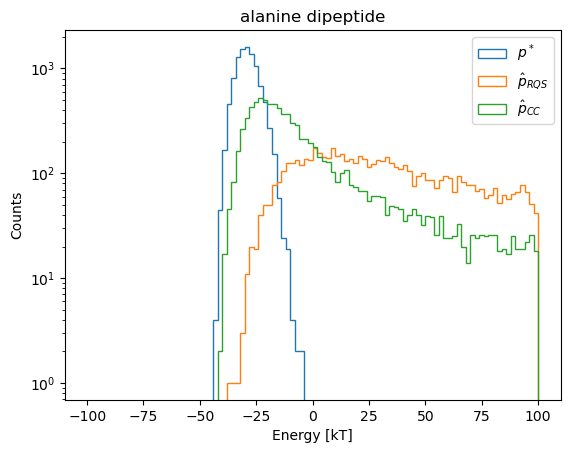

In [36]:
plt.hist(energy_target, bins=100, histtype="step", label=r"$p^*$", range=(-100, 100))
# plt.hist(energyIC, bins=100, histtype="step", label=r"$\hat p_{IC}$", range=(-100, 100))
# plt.hist(energyIC2, bins=100, histtype="step", label=r"$\hat p_{IC2}$", range=(-500, 2000))
plt.hist(energyRQS, bins=100, histtype="step", label=r"$\hat p_{RQS}$", range=(-100, 100))
plt.hist(energyCC, bins=100, histtype="step", label=r"$\hat p_{CC}$", range=(-100, 100))
plt.legend()
plt.xlabel("Energy [kT]")
plt.ylabel("Counts")
plt.yscale("log")
plt.title("alanine dipeptide")

In [ ]:
model_1qka_RNVPICfwkl, test_1qka, system_1qka = load_from_checkpoint("../data/lightning_logs/OppA/Peptides/1qka/RNVPICfwkl/version_1", "../data/Molecules/OppA/Peptides/1qka", "RNVPICfwkl")
model_1qka_RNVPfwkl, _, _ = load_from_checkpoint("../data/lightning_logs/OppA/Peptides/1qka/RNVPfwkl/version_1", "../data/Molecules/OppA/Peptides/1qka", "RNVPfwkl")

In [ ]:
energyIC = system_1qka.energy_model.energy(model_1qka_RNVPICfwkl.sample((10_000,))).cpu().detach().numpy()
energyCC = system_1qka.energy_model.energy(model_1qka_RNVPfwkl.sample((10_000,))).cpu().detach().numpy()
energy_target = system_1qka.energy_model.energy(test_1qka[:10_000]).cpu().detach().numpy()

In [ ]:
plt.hist(energy_target, bins=100, histtype="step", label=r"$p^*$")
plt.hist(energyIC, bins=100, histtype="step", label=r"$\hat p_{IC}$", range=(-500, 2000))
plt.hist(energyCC, bins=100, histtype="step", label=r"$\hat p_{CC}$", range=(-500, 2000))
plt.legend()
plt.xlabel("Energy [k T]")
plt.ylabel("Counts")
plt.yscale("log")
plt.title("Energy of samples from the model and the target distribution")

In [ ]:
x = model_1b4z_RNVPICfwkl.sample((100,))
energy = system_1b4z.energy_model.energy(x).squeeze()

In [ ]:
log_prob = model_1b4z_RNVPICfwkl.log_prob(x).cpu().detach().numpy()

In [ ]:
new = (log_prob - energy.cpu().detach().numpy())

In [ ]:
energy